<a href="https://colab.research.google.com/github/koll-ai/stable-difusion-qrcode/blob/master/colabs/demo_sdqrcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

warnings: I just made it works, might be unstable

In [ ]:
!pip install --upgrade sdqrcode python-dotenv qrcode[pil]

In [ ]:
import sdqrcode.sdqrcode as sdqrcode
import dotenv
import os


In [ ]:
!mkdir -p configs

edit the config file to your needs (will explain parameters in future update)


In [ ]:
%%file ./configs/default.yaml
global:
    prompt: "a beautiful landscape"
    model_name_or_path_or_api_name: "6ce0161689"
    steps: 20
    sampler_name: Euler a
    cfg_scale: 7
    width: 512
    height: 512
    seed: -1

controlnet_units:
    - module: inpaint
      model: control_v1p_sd15_brightness [5f6aa6ed]
      weight: 0.35
      start: 0.0
      end: 1.0

    - module: inpaint
      model: control_v11f1e_sd15_tile [a371b31b]
      weight: 0.5
      start: 0.35
      end: 0.70

qrcode:
    text: "https://koll.ai"
    error_correction: high # [low, medium, quart, high]
    box_size: 10
    border: 4
    fill_color: black
    back_color: white


Overwriting ./configs/default.yaml


Enter your webui infos in the cell below or in the file /content/webui.env

In [ ]:
%%file webui.env

AUTO_API_HOSTNAME=xxx
AUTO_API_PORT=7860
AUTO_API_HTTPS=true
AUTO_API_USERNAME=xxx
AUTO_API_PASSWORD=xxx


Writing webui.env


stable diffusion models [{'title': 'dreamshaperv6.safetensors [853e7e85c4]', 'model_name': 'dreamshaperv6', 'hash': '853e7e85c4', 'sha256': '853e7e85c46be9ad4815666cd335545df32dab5e0d22afe5ccc6ad9bda834b52', 'filename': '/stable-diffusion-webui/models/Stable-diffusion/dreamshaperv6.safetensors', 'config': None}, {'title': 'v1-5-pruned-emaonly.safetensors [6ce0161689]', 'model_name': 'v1-5-pruned-emaonly', 'hash': '6ce0161689', 'sha256': '6ce0161689b3853acaa03779ec93eafe75a02f4ced659bee03f50797806fa2fa', 'filename': '/stable-diffusion-webui/models/Stable-diffusion/v1-5-pruned-emaonly.safetensors', 'config': None}, {'title': 'v2-1_768-ema-pruned.safetensors [dcd690123c]', 'model_name': 'v2-1_768-ema-pruned', 'hash': 'dcd690123c', 'sha256': 'dcd690123cfc64383981a31d955694f6acf2072a80537fdb612c8e58ec87a8ac', 'filename': '/stable-diffusion-webui/models/Stable-diffusion/v2-1_768-ema-pruned.safetensors', 'config': None}, {'title': 'realisticvision2.0.safetensors [c0d1994c73]', 'model_name': '

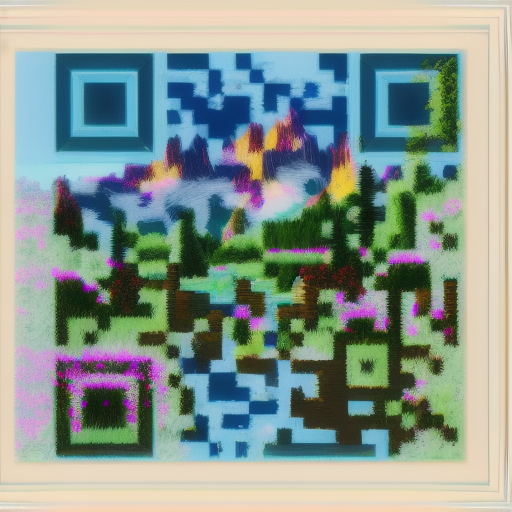

In [ ]:
dotenv.load_dotenv('/content/webui.env')

sd_qr_code = sdqrcode.generate_sd_qrcode(
            config_name_or_path="./configs/default.yaml",
            auto_api_hostname=os.getenv("AUTO_API_HOSTNAME"),
            auto_api_port=os.getenv("AUTO_API_PORT"),
            auto_api_https=os.getenv("AUTO_API_HTTPS") == "true",
            auto_api_username=os.getenv("AUTO_API_USERNAME"),
            auto_api_password=os.getenv("AUTO_API_PASSWORD"),
        )

sd_qr_code[0]

In [ ]:
sd_qr_code[0].save('sdqrcode.png')